<div class="jumbotron" style="background-image: url(https://raw.githubusercontent.com/audunsh/openworld/master/assets/headers/openworld_header_2227.png); background-size: 100% 100% ; background-color: white; background-repeat: no-repeat;">
   <div class="row">
  <div class="col-md-8" markdown="1" style="color:white">
      <h1 >BubbleBox.MDBox: 10 minutes tutorial</h1>
      Author: Audun Skau Hansen <a href="mailto:a.s.hansen@kjemi.uio.no">✉️</a> and Rafael Cortez S. Pupo, 
      The Hylleraas Centre for Quantum Molecular Sciences, UiO, 2021 
  </div>
  <div class="col-md-4" markdown="1">
  </div>
</div>
</div>

This tutorial gives a brief introduction to setting up and running simulations with BubbleBox in the Jupyter Notebook environment. Feel free to skip forward to the relevant information, just make sure you import the required modules.

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home" style = "background-color:rgba(10, 8, 4, .8);border-color:rgba(0, 0, 0, 1)">Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Imports" role="tab" aria-controls="profile">Imports<span class="badge badge-primary badge-pill">1</span></a>
<a class="list-group-item list-group-item-action"  data-toggle="list" href="#Initialization" role="tab" aria-controls="settings">Creating a system<span class="badge badge-primary badge-pill">2</span></a>
<a class="list-group-item list-group-item-action"  data-toggle="list" href="#Initialization2" role="tab" aria-controls="settings">Creating a view<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Variables" role="tab" aria-controls="messages">Variables<span class="badge badge-primary badge-pill">3</span></a>
<a class="list-group-item list-group-item-action"  data-toggle="list" href="#Time propagation" role="tab" aria-controls="settings">Time propagation<span class="badge badge-primary badge-pill">4</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Periodic boundary conditions" role="tab" aria-controls="settings">Periodic boundary conditions<span class="badge badge-primary badge-pill">5</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Mixed boundary conditions" role="tab" aria-controls="settings">Mixed boundary conditions<span class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Masses" role="tab" aria-controls="settings">Masses<span class="badge badge-primary badge-pill">7</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Fixed positions" role="tab" aria-controls="settings">Fixed positions<span class="badge badge-primary badge-pill">8</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#State variables" role="tab" aria-controls="settings">State variables<span class="badge badge-primary badge-pill">9</span></a>

# Imports

Before we start, it is necessary to import the modules that we are going to use in the simulations.

In [1]:
import bubblebox as bb # The simulation toolkit
import evince as ev    # The visualization toolkit
ev.enable_notebook()   # Enable frontend WebGL rendering 

<IPython.core.display.Javascript object>

If any of the above import fails, please run:


In [8]:
!pip install bubblebox evince



You will most likely also want to additionally import the following

In [3]:
import numpy as np  # numerical tools
import matplotlib.pyplot as plt # the standard visualization toolkit

...and that is all. Now your are now ready for the adventure.

<h1>
<span id="Initialization"> </span>
Creating a system
</h1>


We are now going to set up a simple simulation of bubbles in a closed box. To do this, we first have to set up the box, and choose some parameters for it, as the <b>size of the box</b> and the <b>number of bubbles</b>.</p>
    <p> To set up a system we need to call a box and set up the initial parameters. The system can have a name, but we will just call it "s" for simplicity. In order to initialize it, we need to do the following:</p>
 

```python3
    s = bb.mdbox(...) # the initial parameters are set up inside the parenthesis
```
    
<p> The <b>number of bubbles</b> (<code>n_bubbles</code>) is set ut as a positive integer<b> and the size of the box</b> (<code>size</code>) is set up as a <a href= "https://www.w3schools.com/python/python_tuples.asp"> tuple</a> using a <code>(x,y,...)</code> format .The first number in the tuple is the size of the x axis in both positive and negative directions, and the second number is the size of the y axis in both positive and negative directions. The dimensionality is automatically determined from the number of size parameters. Most people prefer 3 or fewer dimensions.</p>
    <p> Another parameter that is important for the system, is the <b>initial velocity</b> of the bubbles. The parameter <code>vel</code> is set up as the maximum initial velocity a bubble can have, but their actual velocities are randomized between 0 and <code>vel</code>. The default value for the <code>vel</code> parameter is 0, so if the vel parameter is not written, it will be considered that the bubbles are at rest.</p>
    <p> An example of setting up a box system with parameters is shown below:</p>



In [4]:
s = bb.mdbox(n_bubbles = 100, size = (10,10), vel = 0)

<p>The number of bubbles in this box is 100 and the dimensions are then set to a 10 x 10 box, going from -10 to 10 in both x and y directions. Their maximum initial velocity is set to 0, which means that the bubbles will start out with zero velocity.</p>

<h1>
<span id="Initialization2"> </span>
Creating a view
</h1>

<p>After setting up the box, you'll likely want to look at what you created. This can be done with the <code>.view()</code> method as follows:
   
<code>s.view()</code>

Note that this command should always be at the end of the cell in the notebook, it returns a javascript canvas which is automatically added to the output region of the cell.

In [5]:
# Set up a monatomic, walled system

# A 20 x 20 walled box
box_dims = (-35,-35)

# Number of bubbles in box
# (Will be uniformly distributed inside box)
number_of_bubbles = 11**2


# Set up box
s = bb.box(n_bubbles = number_of_bubbles, box = box_dims, vel = 1) 

# Visualize box at current state
s.view()

MDView(box=[-35, -35], colors=[[0.4686023674161778, 0.9995263244389858, 0.44770263407048727], [0.4686023674161…

<h1>
<span id="Variables"></span>
Variables
</h1>

When you create an instance of the mdbox object (```s = bb.mdbox(...)```) you create simultaneously all properties and logic of the system, such as how the bubbles interact, how they evolve in time, their masses and their charges. 

This may of course be changed also after you created the system. Let's review some of the properties you can play around with:

### Velocity and position

A bubble ```i``` has position ```s.pos[:,i]``` and velocity ```s.vel[:,i]```, as vectors with the same number of components as your dimensionality. These can be changed manually at any point in the simulation.

You change these elements by invoking 
```s.set_vel( ... )```
and 
```s.set_pos( ... )```



### Masses

A bubble ```i``` also has a mass ```s.masses[i]```, by default set to $1.0$. This number may be a float or integer, and will determine how to particle responds to forces from Newtons second law.

Masses should be changed by invoking

```s.set_masses( ... )```

### Interactions and forces

The interactions between particles ```i``` and ```j``` in the system are currently set with the ```s.interactions[i,j] = np.array([parameter1, parameter2, force()])``` variables. This is still a bit user-unfriendly, but is set for revision in future versions of Bubblebox.

The best way of customizing the forces is to invoke
```s.set_forces( ... )```

### Active and inactive bubbles

In order to allow for irregular boundary conditions and more interesting systems, you can *inactivate* bubbles. A bubble ```i``` will only move around if ´´´s.active[i] = True´´´. All bubbles are active by default.

### Summary and some other variables

In [6]:
s = bb.mdbox(n_bubbles = 64, size = (10,10), vel = 4)

print("Some variables and settings, change interactively at any point in simulation:")
print("Timestep               :", s.dt)
print("Position of bubble  #0 :", s.pos[:,0]) 
print("Velocity of bubble  #0 :", s.vel[:,0])
print("Halfstep vel,bubble #0 :", s.vel_[:,0]) # <- this one is used in the time integration
print("LJ parameters, bubble #0,0 :", s.interactions[0,0]) # <- LJ epsilon and sigma for each pair of particles
print("Status of bubble    #0 :", s.active[0]) #<- if False, particle will not update position
print("Mass of bubble      #0 :", s.masses[0]) # Array containing masses

Some variables and settings, change interactively at any point in simulation:
Timestep               : 0.001
Position of bubble  #0 : [-8.75 -8.75]
Velocity of bubble  #0 : [1.63326272 2.70078007]
Halfstep vel,bubble #0 : [1.63326272 2.70078007]
LJ parameters, bubble #0,0 : [1. 1. 1.]
Status of bubble    #0 : True
Mass of bubble      #0 : 1


<h1>
<span id="Time propagation"></span>
Time propagation
</h1>

Nature is not static, and neither are our systems. <p> In Bubblebox, time may pass in at least three ways: <code>advance</code>, <code>evolve</code> and <code>run</code>.
    
Using finite-difference based time integration (explicit Euler or velocity verlet), the ```s.advance()``` method iterates one step in time. 
    
The ```s.evolve(1.0)``` method, on the other hand, makes several ```.advance()``` iterations in order to makes the time change with 1.0 unit. 
    
When you have a ```s.view()``` visible on screen, you may update the system using the ```s.update_view()``` method. For instance, the following two cells will create and animate the view:

In [10]:
## Time propagation methods

#initializing a 20 x 20 box 
s = bb.mdbox(n_bubbles = 64, size = (10,10),vel = 10)

print(f"Initial time   : {s.t} s")

# Advance one single timestep
s.advance()

print(f"Time after 1 dt: {s.t} s")

# Advance for 1 second
s.evolve(1)

print(f"Time after 1 s : {s.t} s")

# Create a view of the system
s.view()

Initial time   : 0 s
Time after 1 dt: 0.001 s
Time after 1 s : 1.0010000000000006 s


MDView(box=[10, 10], colors=[[0.28031291823600657, 0.3833845144413791, 0.33221986919003454], [0.28031291823600…

In [12]:

# THIS LOOP RUNS FOREVER, PLEASE STOP IT USING THE STOP-BUTTON ABOVE
while True:
    s.advance()
    s.update_view() 

Alternatively, you may run a fixed number of iterations and simulatineously update the view using

In [13]:
s.run( 1000 ) #run 1000 advance steps and update view

<h1>
<span id="Periodic boundary conditions"> </span>
Periodic boundary conditions
</h1>


We have up til now operated only with closed boxes, where particles bounces back when they hit the walls of the box. These walls may in fact be removed by setting ```size=(0,0,..)```. If so, the bubbles will just move freely in any direction. 

A third option when a bubble hits a wall is to just teleport it to the same position at the opposing wall. We call this boundary condition *periodic*, and you may initialize your system in this way with ```size = (-10,-20,-3)```. *Negative size parameters* is interpreted as periodic boundary conditions.


<h1>
<span id="Mixed boundary conditions"> </span>
Mixed boundary conditions
</h1>


You may of course combine these conditions. For instance ```size =(-10,1,0,0,0)``` will create a system where the particles are periodically translated between (-10,10) in the x-direction, confined between two walls at (-1,1) in the y direction and free to move wherever in the z-, æ- and ø- directions. (Bubblebox does not judge you for making crazy systems)

In [ ]:
# a 5D system with mixed boundary conditions

system = bb.mdbox(n_bubbles = 400, size = (-10,1,0,0,0)) 

<h1>
<span id="Masses"> &nbsp; </span>
Masses
</h1>

Earlier, we have mentioned the <code>masses</code> variable. The colors in Bubblebox are chosen automatically from the masses, so in order to make some nice mixed systems we can set these manually after initialization. Below, we set half the bubbles to a heavier mass:

In [ ]:
# Set up and run a diatomic system


# Set up box
s = bb.mdbox(n_bubbles = 1000, size = (10,10,10)) 

# Change mass of half the particles
s.masses = np.exp(-.03*np.sum(s.pos**2, axis = 0))


# view system
s.view() 

<h1>
<span id="Fixed positions"> &nbsp; </span>
Fixed positions
</h1>

 One interesting feature of the <b>BubbleBox</b> module, is the possibility of deactivating bubbles, so they won't move and therefore remain fixed when time evolves. The <code>active</code> variable is an 1D array with <a href= https://press.rebus.community/programmingfundamentals/chapter/boolean-data-type/>Boolean values</a>, which tells us the status of the bubbles.
 
An example of how to use it is shown below:

In [ ]:
# Set up and run a diatomic system with fixed atoms at boundaries / irregular boundary conditions



# Set up box
s = bb.mdbox(n_bubbles = 400, size = (-10,10)) 

# Change mass of half the bubbles
s.masses[int(number_of_bubbles/4):int(3*number_of_bubbles/4):] = 5

# Assign more mass to the boundary, lock them in position
s.masses[:20] = 10
s.masses[-20:] = 10

s.active[:20] = False
s.active[-20:] = False



# Change timestep
s.dt = 0.005

# Not much interesting will happen unless you add some tiny perturbation
s.vel_ = np.random.uniform(-.1, .1, system.vel_.shape)

# view system
s.view() 

<h1>
<span id="State variables">  </span>
State variables
</h1>

Ideally, we would like quick access to thermodynamic variables such as temperature and pressure. The kinetic energy (or kinetic temperature) is computed from ```s.compute_kinetic_energy()``` or ```s.kinetic_energies()``` (if you would like the kinetic energy per particle explicitly).

Furthermore, mdbox continually counts collisions with the boundary. The ```s.col``` variable stores the number of collisions which happened during the previous call to ```s.advance()```. 


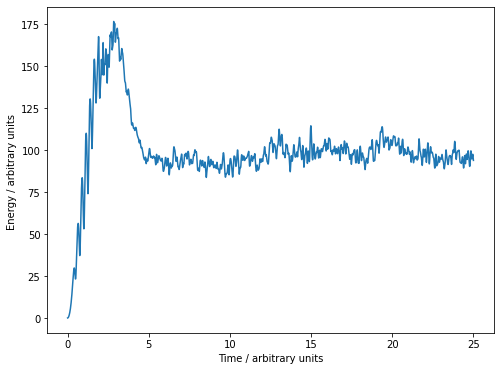

End temperature: 93.84
End temperature: 0.47
Number of collisions with boundary per time: 3.92


In [14]:
# Kinetic energy and temperature

# Set up box
s = bb.mdbox(n_bubbles = 200, size = (10,10)) 

# Compute kinetic energies for nt timesteps
nt = 50000

s.dt = 0.0005

kinetic_energies = np.zeros(nt, dtype = float)
collisions = np.zeros(nt, dtype = float)
for i in range(nt):
    s.advance()
    kinetic_energies[i] = s.compute_kinetic_energy()
    collisions[i] = s.col

plt.figure(2, figsize=  (8,6))
plt.plot(np.linspace(0,s.t, nt), kinetic_energies)
plt.xlabel("Time / arbitrary units")
plt.ylabel("Energy / arbitrary units ")
plt.show()

print(f"End temperature: {np.mean(s.compute_kinetic_energy()):.2f}") #Calculate the average kinetic energy

print(f"End temperature: {s.compute_kinetic_energy()/s.n_bubbles:.2f}") #We can use kinetic_energy() as well 

print(f"Number of collisions with boundary per time: {(np.sum(collisions)/s.t):.2f}")
